# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [3]:
#   Exploratory Data Analysis  Reads images from subfolders.  Extracts features using ResNet50.  Performs Principal Component Analysis (PCA) for visualization.

Feature extraction completed. Saved as 'rock_features.csv'.


C:\Users\parik\AppData\Local\Temp\ipykernel_18644\1751824398.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=[classes[label] for label in labels], palette="viridis")


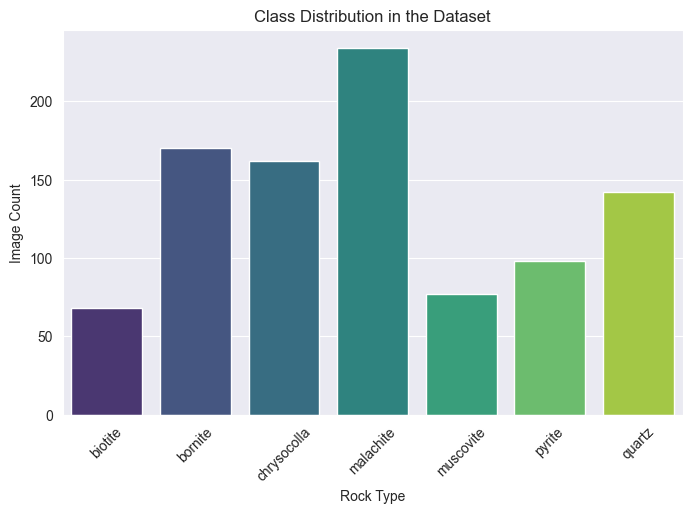

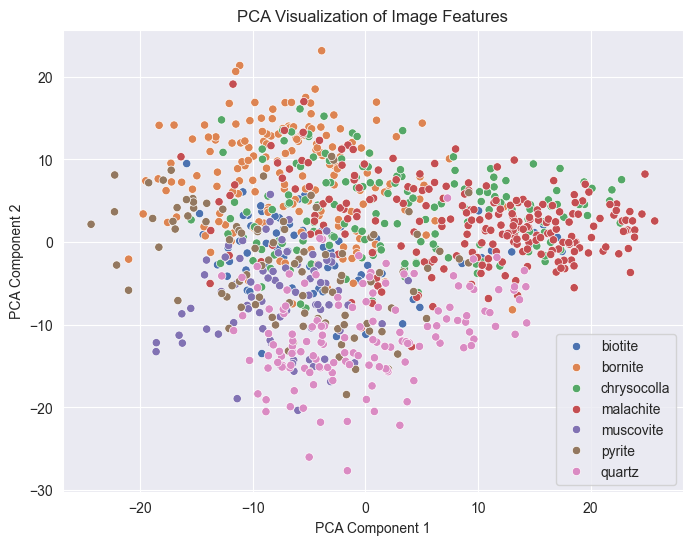

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.decomposition import PCA

# Set dataset path (CHANGE THIS TO YOUR ACTUAL DATASET LOCATION)
dataset_path = "./minet"

# Get class labels (folder names) while ignoring hidden files
classes = [folder for folder in sorted(os.listdir(dataset_path)) if not folder.startswith(".")]

# Load pre-trained model (ResNet50 without top layers)
model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

# Feature extraction function
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features.flatten()

# Extract features from all images
data = []
labels = []

for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Skip non-image files (like .ipynb_checkpoints)
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        features = extract_features(img_path)
        data.append(features)
        labels.append(class_index)

# Convert to DataFrame
df = pd.DataFrame(data)
df["label"] = labels

# Save as CSV for analysis
df.to_csv("rock_features.csv", index=False)
print("Feature extraction completed. Saved as 'rock_features.csv'.")

# --- Data Visualization ---

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=[classes[label] for label in labels], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Rock Type")
plt.ylabel("Image Count")
plt.title("Class Distribution in the Dataset")
plt.show()

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=[classes[label] for label in labels], palette="deep")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Image Features")
plt.legend(loc="best")
plt.show()


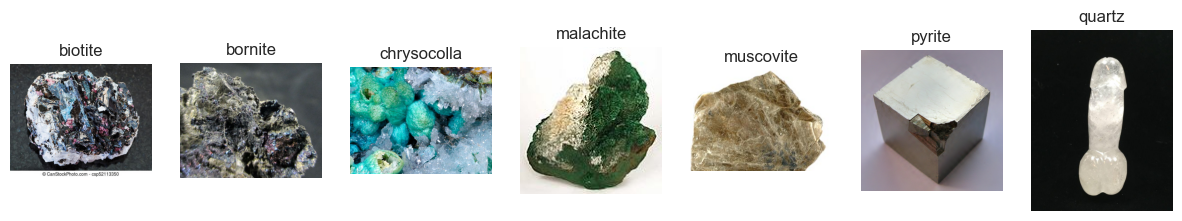

In [5]:
#Select Random Images from Your Dataset
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set dataset path
dataset_path = "./minet"  # Update with your actual dataset folder path

# Get list of rock categories (subfolders)
categories = [folder for folder in sorted(os.listdir(dataset_path)) if not folder.startswith(".")]

# Select random images (one from each category)
num_samples = 5  # Number of images to select
selected_images = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):
        continue

    image_files = [f for f in os.listdir(category_path) if f.endswith((".jpg", ".png", ".jpeg"))]
    if len(image_files) > 0:
        selected_images.append(os.path.join(category_path, random.choice(image_files)))

# Display selected images
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for i, img_path in enumerate(selected_images):
    img = load_img(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(os.path.basename(os.path.dirname(img_path)))

plt.show()


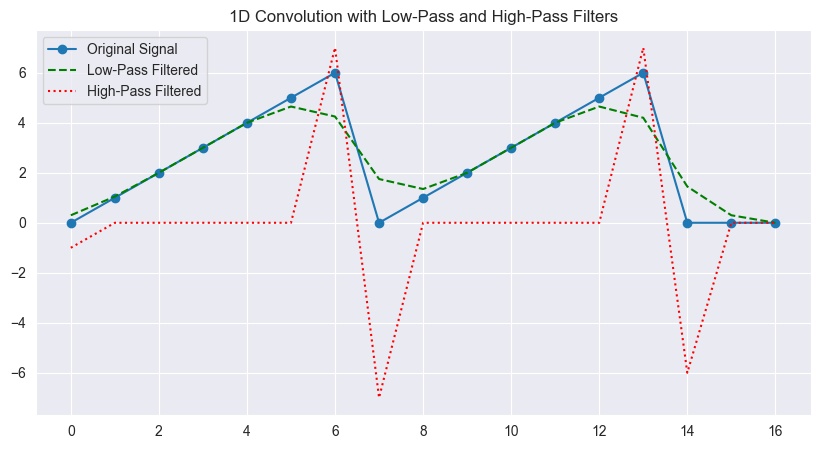

In [6]:
# Apply Convolution Filters to 1D Signal
import numpy as np
import matplotlib.pyplot as plt

# Given signal X
X = np.array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])

# Low-pass filter
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])

# High-pass filter
H_H = np.array([-1, 2, -1])

# Apply convolution
y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

# Plot original signal and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", marker='o')
plt.plot(y_low, label="Low-Pass Filtered", linestyle="--", color="g")
plt.plot(y_high, label="High-Pass Filtered", linestyle=":", color="r")
plt.legend()
plt.title("1D Convolution with Low-Pass and High-Pass Filters")
plt.show()


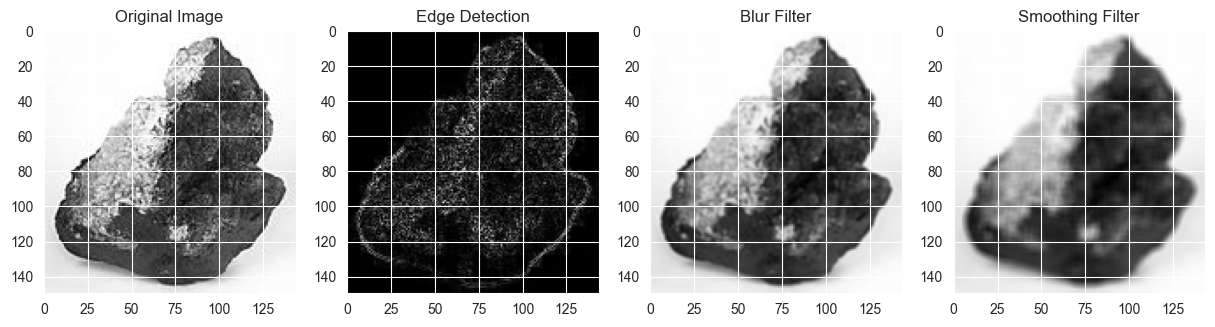

In [7]:
# A2 Apply Image Filters to Randomly Selected Images
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.io import imread
from skimage.color import rgb2gray

# Select a random image from the previously picked images
random_img_path = random.choice(selected_images)

# Load image
img = imread(random_img_path)
img_gray = rgb2gray(img) * 255  # Convert to grayscale

# Define convolution filters
filter1 = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1,  0]])  # Edge Detection
filter2 = np.array([[0.2, 0.5,  0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Blur
filter3 = np.ones((5, 5)) / 25  # Smoothing Filter

# Apply convolution
filtered1 = convolve2d(img_gray, filter1, mode='same', boundary='symm')
filtered2 = convolve2d(img_gray, filter2, mode='same', boundary='symm')
filtered3 = convolve2d(img_gray, filter3, mode='same', boundary='symm')

# Plot original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(np.abs(filtered1), cmap='gray')
axes[1].set_title("Edge Detection")
axes[2].imshow(filtered2, cmap='gray')
axes[2].set_title("Blur Filter")
axes[3].imshow(filtered3, cmap='gray')
axes[3].set_title("Smoothing Filter")
plt.show()


In [8]:
# A3: Train MLP Classifier on a Random Subset of Images
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load extracted features dataset
df = pd.read_csv("rock_features.csv")  # Ensure features are extracted before running this

# Select a random subset (e.g., 50% of the data)
subset_size = 0.5  # Change this to train on more/fewer images
df_subset = df.sample(frac=subset_size, random_state=42)

# Split data into features and labels
X = df_subset.iloc[:, :-1].values
y = df_subset["label"].values

# One-hot encode labels
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("rock_classifier.h5")
print(f"Model training complete. Saved as 'rock_classifier.h5' using {len(X_train)} images.")


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4257 - loss: 1.8335 - val_accuracy: 0.6667 - val_loss: 0.9538
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9479 - loss: 0.2552 - val_accuracy: 0.6979 - val_loss: 0.7725
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9994 - loss: 0.0605 - val_accuracy: 0.7083 - val_loss: 0.7915
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 0.7292 - val_loss: 0.8142
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.7500 - val_loss: 0.8203
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.7604 - val_loss: 0.8229
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.7500 - val_loss: 0.8250
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.7500 - v

Model training complete. Saved as 'rock_classifier.h5' using 380 images.


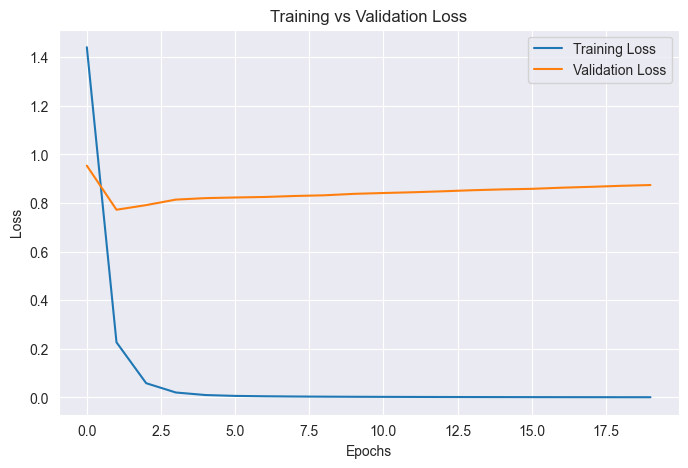

In [9]:
# Plot training & validation loss A4: Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [10]:
# A5: Test Model on Randomly Selected Images
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np

# Load trained MLP model
model = load_model("rock_classifier.h5")

# Load pre-trained ResNet50 model for feature extraction
feature_extractor = ResNet50(weights="imagenet", include_top=False, pooling="avg")

# Function to extract features from an image
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using ResNet50
    features = feature_extractor.predict(img_array)
    return features.flatten().reshape(1, -1)  # Reshape for MLP model

# Predict class for each randomly selected image
for img_path in selected_images:
    img_features = extract_features(img_path)  # Extract features
    prediction = model.predict(img_features)  # Predict using MLP model
    predicted_class = np.argmax(prediction)

    print(f"Image: {img_path}")
    print(f"Predicted Class: {categories[predicted_class]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Image: ./minet\biotite\0032.jpg
Predicted Class: bornite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: ./minet\bornite\0110.jpg
Predicted Class: bornite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: ./minet\chrysocolla\0053.jpg
Predicted Class: chrysocolla

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: ./minet\malachite\0047.jpg
Predicted Class: bornite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: ./minet\muscovite\0010.jpg
Predicted Class: muscovite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: ./minet\pyrite\0069.jpg
Predicted Class: pyrite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: ./minet\quartz\0127.jpg
Predicted Class: quartz



In [11]:
# Generate a Table of Predictions
import pandas as pd
from tabulate import tabulate  # Install via: pip install tabulate

# Store results
results = []

for img_path in selected_images:
    img_features = extract_features(img_path)  # Extract features
    prediction = model.predict(img_features)  # Predict using MLP model
    predicted_class = np.argmax(prediction)

    # Get actual class from folder name
    actual_class = os.path.basename(os.path.dirname(img_path))

    results.append([os.path.basename(img_path), actual_class, categories[predicted_class]])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Image", "Actual Class", "Predicted Class"])

# Print as table
print(tabulate(df_results, headers="keys", tablefmt="pretty"))

# Save to CSV
df_results.to_csv("test_predictions.csv", index=False)
print("\nPredictions saved as 'test_predictions.csv'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
+---+----------+--------------+-----------------+
|   |  Image   | Actual Class | Predicted Class |
+---+----------+--------------+-----------------+
| 0 | 0032.jpg |   biotite    |     bornite     |
| 1 | 0110.jpg |   bornite    |     bornite     |
| 2 | 0053.jpg | chrysocolla  |   chrysocolla   |
| 3 | 0047.jpg |  malachite   |     bornite     |
| 4 | 0010.jpg |  muscovite   |    muscovite    |
| 5 | 0069.jpg |    pyrite    |     pyrite      |
| 6 | 0127.

In [12]:
# Lab 4 A1: Design and Train a CNN on Your Dataset
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define dataset path
dataset_path = "minet"  # Update this to your actual dataset location

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for classification
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model summary
model.summary()


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 968ms/step - accuracy: 0.2376 - loss: 1.8777 - val_accuracy: 0.5132 - val_loss: 1.4247
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 817ms/step - accuracy: 0.4366 - loss: 1.4460 - val_accuracy: 0.5397 - val_loss: 1.1410
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 599ms/step - accuracy: 0.5408 - loss: 1.1686 - val_accuracy: 0.6667 - val_loss: 0.9403
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 599ms/step - accuracy: 0.6570 - loss: 0.9648 - val_accuracy: 0.6772 - val_loss: 0.9203
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 586ms/step - accuracy: 0.6783 - loss: 0.9097 - val_accuracy: 0.6561 - val_loss: 0.8955
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 519ms/step - accuracy: 0.7229 - loss: 0.7514 - val_accuracy: 0.6825 - val_loss: 0.8463
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 513ms/step - accuracy: 0.7504 - loss: 0.7104 - val_accuracy: 0.6931 - val_loss: 0.8255
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 668ms/step - accuracy: 0.7921 - loss: 0.6138 - val_accu

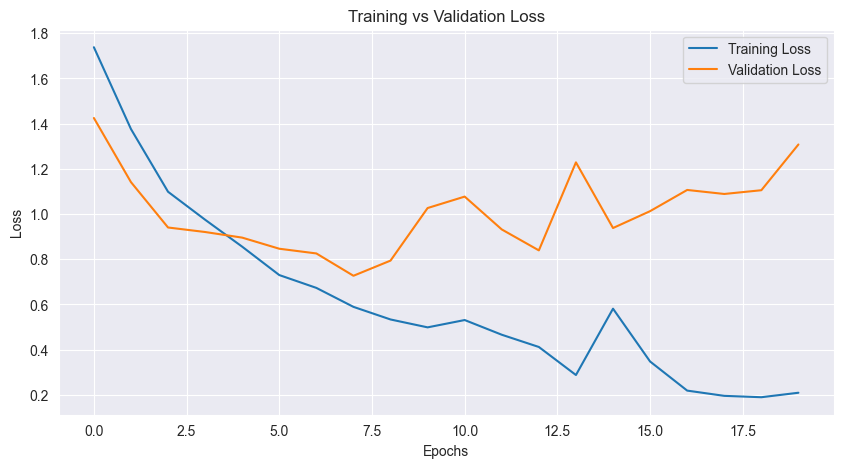

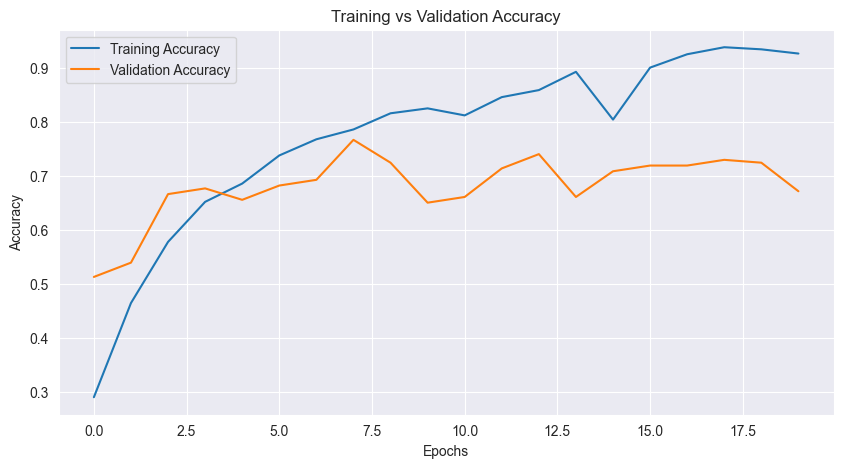

In [13]:
# Train the model A2: Train the Model and Plot Loss/Accuracy
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Adjust based on performance
    verbose=1
)

# Save trained model
model.save("rock_cnn_model.h5")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [14]:
# Evaluate the trained model A3: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.6798 - loss: 1.1500
Test Accuracy: 0.67


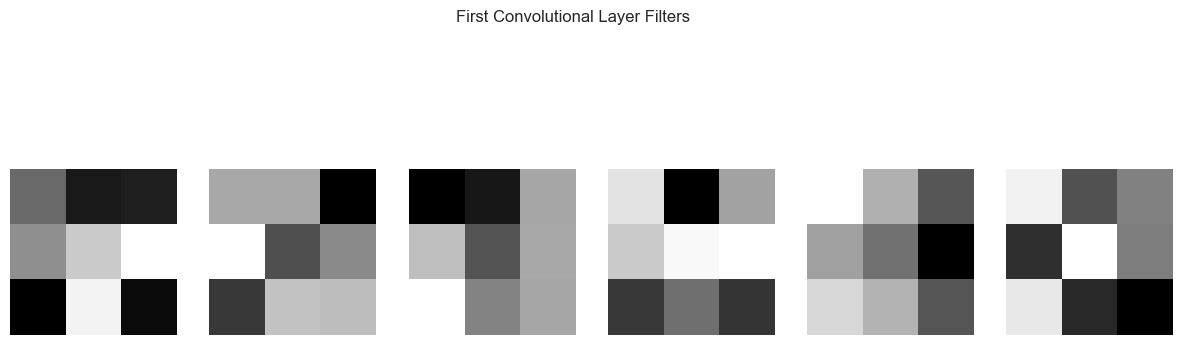

In [15]:
# A4: Inspect CNN Filters
import matplotlib.pyplot as plt

# Extract filters from the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Display first 6 filters
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    ax = axes[i]
    filter_img = filters[:, :, :, i]  # Extract i-th filter
    ax.imshow(filter_img[:, :, 0], cmap="gray")
    ax.axis("off")
plt.suptitle("First Convolutional Layer Filters")
plt.show()


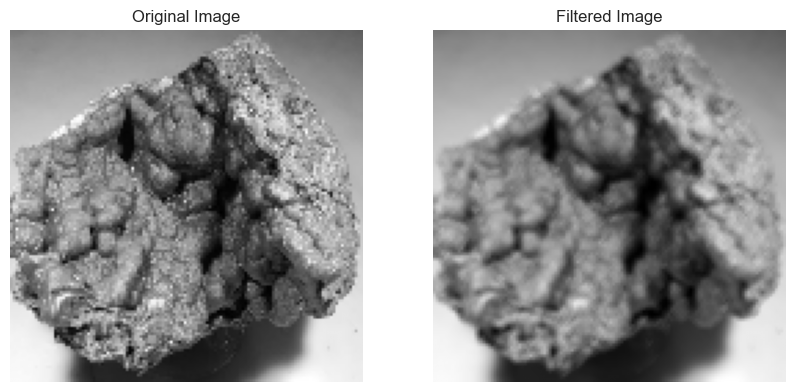

In [16]:
# A5: Apply a Filter to an Input Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Select a sample image from validation set
sample_batch = next(val_generator)
sample_img = sample_batch[0][0]  # First image from batch

# Ensure the image is converted to grayscale properly
sample_img_gray = cv2.cvtColor(sample_img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
sample_img_gray = sample_img_gray.astype(np.float32)  # Ensure correct dtype

# Apply a filter from the first layer
selected_filter = filters[:, :, 0, 0]  # Correct indexing for a 2D filter
filtered_img = convolve2d(sample_img_gray, selected_filter, mode="same", boundary="symm")

# Plot original and filtered image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img_gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap="gray")
plt.title("Filtered Image")
plt.axis("off")

plt.show()


In [17]:
#  A6: Implement a Fully Connected Network
from tensorflow.keras.layers import Flatten

# Define a simple dense network
mlp_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten image into 1D vector
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mlp_model.summary()


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,292,487 (24.00 MB)

 Trainable params: 6,292,487 (24.00 MB)

 Non-trainable params: 0 (0.00 B)

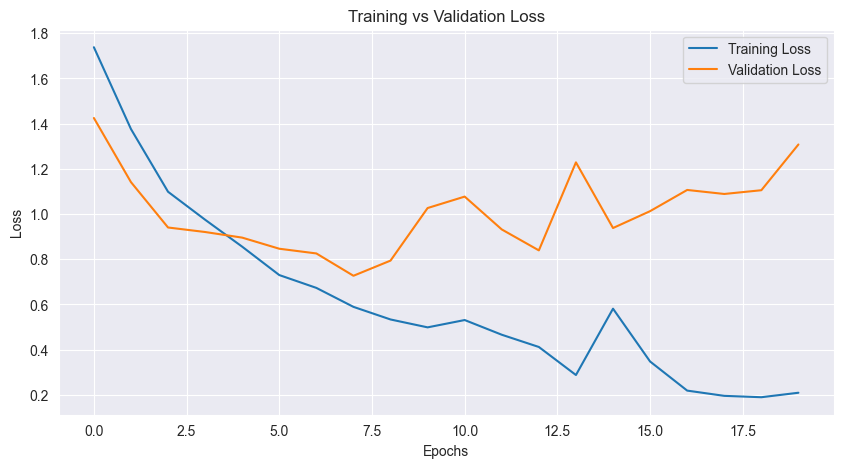

In [18]:
# Plot loss trends again for better observation A7: Check Training and Validation Loss Trends
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [19]:
# A8: Test the Network and Observe Metrics
from sklearn.metrics import classification_report

# Predict on validation data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get actual labels
y_true = val_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys()))


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step
              precision    recall  f1-score   support

     biotite       0.20      0.08      0.11        13
     bornite       0.15      0.18      0.16        34
 chrysocolla       0.10      0.09      0.10        32
   malachite       0.28      0.23      0.25        47
   muscovite       0.10      0.13      0.11        15
      pyrite       0.08      0.11      0.09        19
      quartz       0.07      0.07      0.07        29

    accuracy                           0.14       189
   macro avg       0.14      0.13      0.13       189
weighted avg       0.15      0.14      0.14       189



In [20]:
import tensorflow as tf

model = tf.keras.models.load_model('rock_cnn_model.h5')
print(type(model))


<class 'keras.src.models.sequential.Sequential'>


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Load the trained CNN model
model = tf.keras.models.load_model('rock_cnn_model.h5')

# Ensure the model is initialized
dummy_input = np.random.random((1, 128, 128, 3))
model.predict(dummy_input)

# Display model summary for verification
model.summary()

# Extract convolutional layers for visualization
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Create a model to output feature maps
visualization_model = Model(inputs=model.input, outputs=layer_outputs)

# Load and preprocess a sample image
image_path = './minet/biotite/0066.jpeg'

# Ensure the image size matches model input shape (128, 128)
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Check input array shape to verify correctness
print("Image Input Shape:", img_array.shape)

# Generate feature maps
feature_maps = visualization_model.predict(img_array)

# Visualize feature maps from each convolutional layer
for layer_name, feature_map in zip([layer.name for layer in model.layers if 'conv' in layer.name], feature_maps):
    print(f"Visualizing Layer: {layer_name}")
    num_filters = feature_map.shape[-1]

    # Display the first 6 feature maps
    plt.figure(figsize=(15, 15))
    for i in range(min(num_filters, 6)):
        plt.subplot(1, 6, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.title(f"{layer_name} - Filter {i}")
        plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,545 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Define dataset path (update this based on your system)
DATASET_PATH = "./minet"  # Change this to the actual path

# Image parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32

In [23]:
# Load dataset using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80-20 train-validation split

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Get number of classes
num_classes = len(train_generator.class_indices)

Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.


In [24]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")  # Output layer with softmax activation
    ])
    return model

# Create model
model = build_model((IMG_SIZE[0], IMG_SIZE[1], 3), num_classes)

C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [26]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2102 - loss: 1.9871 - val_accuracy: 0.3280 - val_loss: 1.5334
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 819ms/step - accuracy: 0.3877 - loss: 1.4397 - val_accuracy: 0.5132 - val_loss: 1.1693
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 627ms/step - accuracy: 0.5832 - loss: 1.1207 - val_accuracy: 0.5767 - val_loss: 1.1014
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 555ms/step - accuracy: 0.6447 - loss: 0.9393 - val_accuracy: 0.7143 - val_loss: 0.7677
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 552ms/step - accuracy: 0.7233 - loss: 0.7731 - val_accuracy: 0.7143 - val_loss: 0.7678
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step - accuracy: 0.8000 - loss: 0.5934 - val_accuracy: 0.7090 - val_loss: 0.7780
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 608ms/step - accuracy: 0.7894 - loss: 0.5803 - val_accuracy: 0.7302 - val_loss: 0.7548
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 505ms/step - accuracy: 0.8322 - loss: 0.4452 - val_accurac

In [27]:
model.save("mineral_cnn_model.h5")


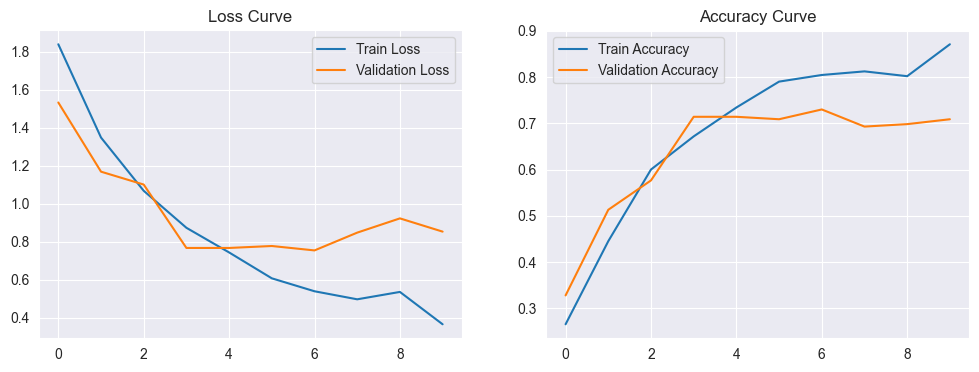

In [28]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.title("Loss Curve")

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.show()

plot_training_history(history)